# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv("states_edu.csv")

df.head(20)


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset?

In [7]:
df["YEAR"].nunique()


33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [8]:
newdf = df.loc[df["STATE"].str.contains("MICHIGAN|OHIO", regex = True)]
newdf.dropna(subset = "AVG_MATH_8_SCORE", inplace = True)
newdf.set_index("PRIMARY_KEY", inplace = True)

michigan = 0
ohio = 0

for i in newdf["YEAR"].unique():
  if (newdf.loc[str(i) + "_MICHIGAN"]["AVG_MATH_8_SCORE"]) > (newdf.loc[str(i) + "_OHIO"]["AVG_MATH_8_SCORE"]):
    michigan += 1
  else:
    ohio += 1
  # print(michigan)
  # print(ohio)

if michigan > ohio:
  print("Michigan has the higher average")
else:
  print("Ohio has the higher AVG_MATH_8_SCORE across all years")





Ohio has the higher AVG_MATH_8_SCORE across all years


Find the average for your chosen test across all states in 2019

In [9]:
df = pd.read_csv("states_edu.csv")
df.set_index("YEAR", inplace = True)
df.loc[2019]["AVG_MATH_8_SCORE"].mean()



281.2641509433962

For each state, find a maximum value for your chosen test score

In [10]:
maxavgmath = df.groupby("STATE")
maxavgmath["AVG_MATH_8_SCORE"].max()


,AVG_MATH_8_SCORE
STATE,
ALABAMA,269.0
ALASKA,283.0
ARIZONA,283.0
ARKANSAS,279.0
CALIFORNIA,277.0
COLORADO,292.0
CONNECTICUT,289.0
DELAWARE,284.0
DISTRICT_OF_COLUMBIA,269.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [11]:
df["EXPENDITURE_PER_STUDENT"] = df["TOTAL_EXPENDITURE"] / df["GRADES_ALL_G"]


df.head(20)

,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT
YEAR,,,,,,,,,,,,,,,,,,,,,
1992,1992_ALABAMA,ALABAMA,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221
1992,1992_ALASKA,ALASKA,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,7.939520
1992,1992_ARIZONA,ARIZONA,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774
1992,1992_ARKANSAS,ARKANSAS,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044
1992,1992_CALIFORNIA,CALIFORNIA,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536
1992,1992_COLORADO,COLORADO,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,5.329154
1992,1992_CONNECTICUT,CONNECTICUT,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,1142600.0,...,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN,7.618262
1992,1992_DELAWARE,DELAWARE,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,194915.0,...,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN,6.123254
1992,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,316679.0,...,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN,9.178657


Feature engineering justification: I did feature of expenditure per student to better estimate

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average Grade 8 Math Score')

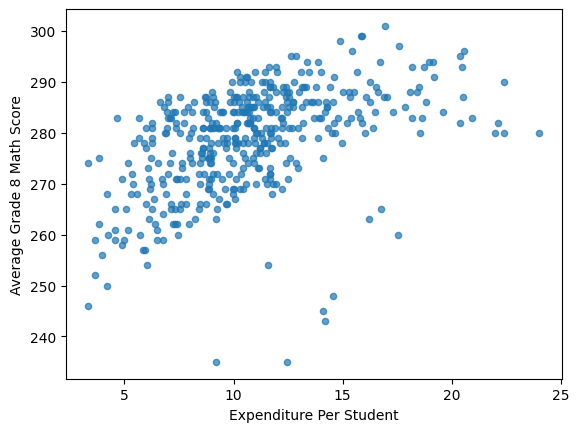

In [12]:
df.plot.scatter(x='EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.7)
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Grade 8 Math Score')

**Observations: **

The scatter plot illustrates a direct, positive relationship between the Expenditure Per Student and Average Grade 8 Math Score with a somewhat moderately strong correlation between the variables

**Visualization 2**



Text(0, 0.5, '8th Grade Math Score')

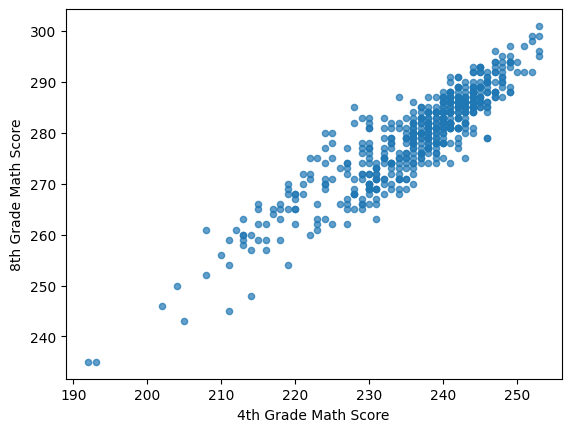

In [13]:

df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.7)
plt.xlabel('4th Grade Math Score')
plt.ylabel('8th Grade Math Score')

Observations:

The scatter plot aboveshows a direct, positive relationship between the 4th Grade Math Score and 8th Grade Math Score with an strong corrleation between the variables.  





<h2> Data Creation </h2>

_Use this space to create train/test data_

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
# Check if length of rows for both prediction and response variables is matching

X = df[["AVG_MATH_4_SCORE", "EXPENDITURE_PER_STUDENT"]].dropna()
y = df["AVG_MATH_8_SCORE"].dropna()

print(X.shape)
print(y.shape)

(440, 2)
(602,)


In [16]:
# Since X has 440 rows after dropping null values and y has 602 rows after dropping null values, we must fill in the columns of X and y to make 1715 rows

X = df[["AVG_MATH_4_SCORE", "EXPENDITURE_PER_STUDENT"]]
y = df["AVG_MATH_8_SCORE"]
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [18]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [19]:
# create your model here
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
# mean squared error
print(mean_squared_error(y_test, y_pred))
# root mean squared error
print(mean_squared_error(y_test, y_pred, squared = False))
# r2 Score
print(r2_score(y_test, y_pred))
# mean error
print(np.mean(model.predict(X_test)-y_test))
# mean absolute error
print(np.mean(np.abs(model.predict(X_test)-y_test)))

15.453496724353695
3.9310935786818524
0.5959989109366285
-0.21223207193321642
1.594524708048914


We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

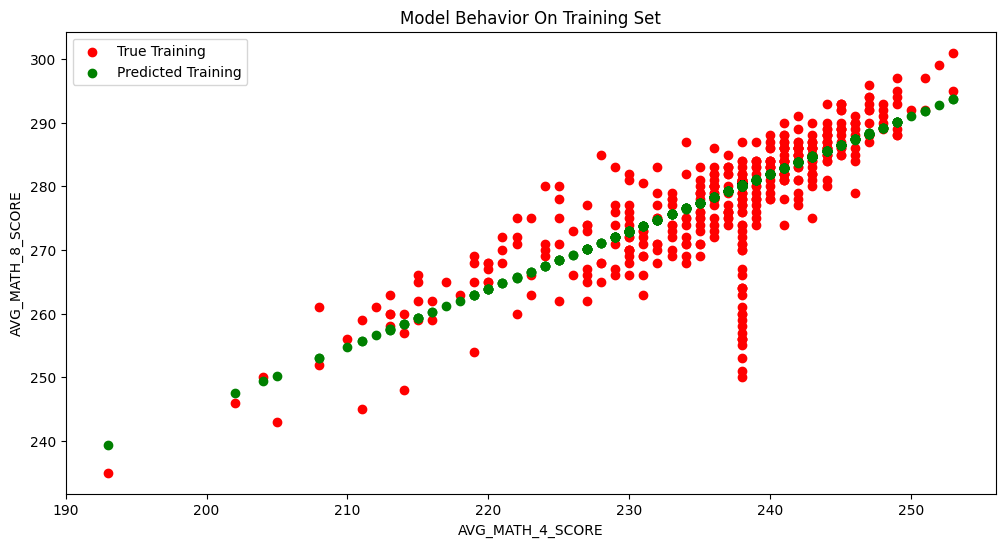

In [23]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

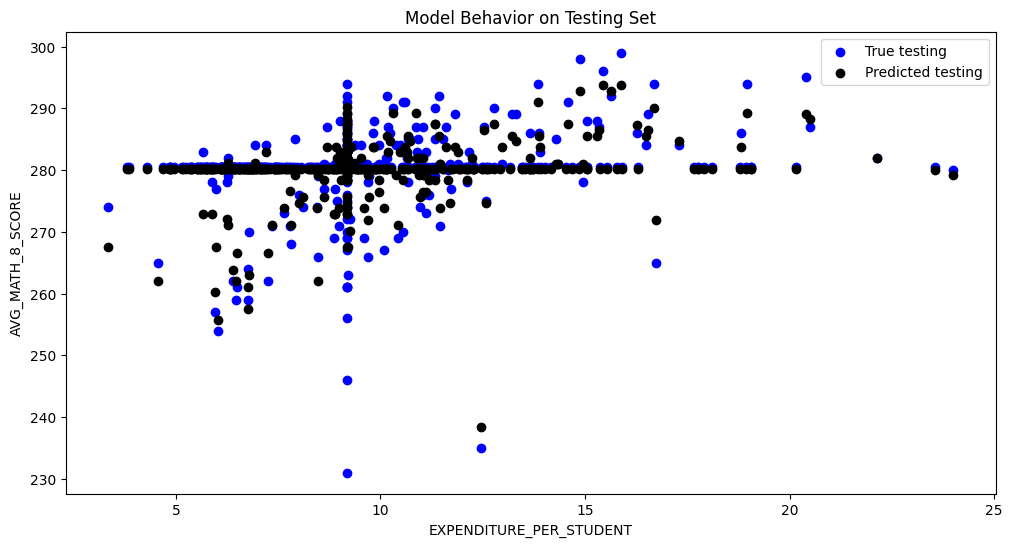

In [24]:
col_name = 'EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")